In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

분석 전 게임 정보
- 경매장에서 거래되는 아이템들이 다른 서버 유저와 거래 가능 -> 서버 별 df 분리 X
- 직업 별 착용 아이템이 다름 -> 직업 별로 df 분리

## 유저 정보 데이터 전처리
- 'slotId'
- 'slotName'
- 'itemId'
- 'itemName'
- 'clone_itemId'
- 'clone_itemName'


파츠 속성 중 6개 속성 선정</br>
12개의 파츠에 적용

### 데이터 불러오기

In [56]:
user1 = pd.read_csv("user1.csv")
user2 =pd.read_csv("user2.csv")
user3 =pd.read_csv("user3.csv")

user = pd.concat([user1,user2,user3],ignore_index=True)
del user1,user2,user3

In [57]:
user.columns

Index(['Unnamed: 0', 'serverId', 'characterId', 'characterName', 'level',
       'jobId', 'jobName', 'jobGrowId', 'jobGrowName', 'fame'],
      dtype='object')

In [58]:
output1 = pd.read_csv("output1.csv")
output2 =pd.read_csv("output2.csv")
output3 =pd.read_csv("output3.csv")

data = pd.concat([output1,output2,output3],ignore_index=True)
data = pd.concat([data, user['serverId']],axis=1)
# data = data.drop('Unnamed: 0', axis=1)

del output1,output2,output3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15120\2823437758.py:1: DtypeWarning: Columns (124,125,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  output1 = pd.read_csv("output1.csv")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15120\2823437758.py:3: DtypeWarning: Columns (124,125,148,149,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  output3 =pd.read_csv("output3.csv")


In [59]:
user = user[['Unnamed: 0','serverId','characterId','characterName','fame']]
user

,serverId,characterId,characterName,fame
0,anton,150a23219a59e086e36db59028c06a50,헤롱카테,66993
1,hilder,0daa8c49cae531262f966dd637008e30,민트크림소스,66787
2,anton,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,66702
3,prey,3ba38c77f2868f34d910e362d0f4cae1,프라디지,66666
4,diregie,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,66660
...,...,...,...,...
90595,hilder,5c37706a64742ce164d02b06456ec3d9,윤아에용,60468
90596,cain,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,60468
90597,prey,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,60468
90598,prey,9c068b798696f994d39b14a0840abb10,찌뮤,60468


### 칼럼명 정의

In [5]:
name = ['HEADGEAR'
,'HAIR'
,'FACE'
,'JACKET'
,'PANTS'
,'SHOES'
,'BREAST'
,'WAIST'
,'SKIN'
,'AURORA'
,'WEAPON'
,'AURA_SKIN']

In [60]:
columns = ['serverId',
    'characterId',
'characterName',
'jobId',
'jobName',
'HEADGEAR__avatar_slotId',
'HEADGEAR__avatar_slotName',
'HEADGEAR__avatar_itemId',
'HEADGEAR__avatar_itemName',

'HEADGEAR__avatar_clone_itemId',
'HEADGEAR__avatar_clone_itemName',

'HAIR__avatar_slotId',
'HAIR__avatar_slotName',
'HAIR__avatar_itemId',
'HAIR__avatar_itemName',

'HAIR__avatar_clone_itemId',
'HAIR__avatar_clone_itemName',

'FACE__avatar_slotId',
'FACE__avatar_slotName',
'FACE__avatar_itemId',
'FACE__avatar_itemName',

'FACE__avatar_clone_itemId',
'FACE__avatar_clone_itemName',

'JACKET__avatar_slotId',
'JACKET__avatar_slotName',
'JACKET__avatar_itemId',
'JACKET__avatar_itemName',

'JACKET__avatar_clone_itemId',
'JACKET__avatar_clone_itemName',

'PANTS__avatar_slotId',
'PANTS__avatar_slotName',
'PANTS__avatar_itemId',
'PANTS__avatar_itemName',

'PANTS__avatar_clone_itemId',
'PANTS__avatar_clone_itemName',

'SHOES__avatar_slotId',
'SHOES__avatar_slotName',
'SHOES__avatar_itemId',
'SHOES__avatar_itemName',

'SHOES__avatar_clone_itemId',
'SHOES__avatar_clone_itemName',

'BREAST__avatar_slotId',
'BREAST__avatar_slotName',
'BREAST__avatar_itemId',
'BREAST__avatar_itemName',

'BREAST__avatar_clone_itemId',
'BREAST__avatar_clone_itemName',

'WAIST__avatar_slotId',
'WAIST__avatar_slotName',
'WAIST__avatar_itemId',
'WAIST__avatar_itemName',

'WAIST__avatar_clone_itemId',
'WAIST__avatar_clone_itemName',

'SKIN__avatar_slotId',
'SKIN__avatar_slotName',
'SKIN__avatar_itemId',
'SKIN__avatar_itemName',

'SKIN__avatar_clone_itemId',
'SKIN__avatar_clone_itemName',

'AURORA__avatar_slotId',
'AURORA__avatar_slotName',
'AURORA__avatar_itemId',
'AURORA__avatar_itemName',

'AURORA__avatar_clone_itemId',
'AURORA__avatar_clone_itemName',

'WEAPON__avatar_slotId',
'WEAPON__avatar_slotName',
'WEAPON__avatar_itemId',
'WEAPON__avatar_itemName',

'WEAPON__avatar_clone_itemId',
'WEAPON__avatar_clone_itemName',

'AURA_SKIN__avatar_slotId',
'AURA_SKIN__avatar_slotName',
'AURA_SKIN__avatar_itemId',
'AURA_SKIN__avatar_itemName',

'AURA_SKIN__avatar_clone_itemId',
'AURA_SKIN__avatar_clone_itemName',
]

### 칼럼명 변경

In [61]:
data = data[columns]

In [62]:
len(columns)

77

In [63]:
len(data.columns)

77

### 이상치 검색

#### 1. characterName이 없는 데이터

In [64]:
data['characterName'].isnull().sum()

2

In [65]:
for i in tqdm(range(len(data))):
    if data['characterName'].isnull()[i]:
        print(i)

 22%|██▏       | 20182/90600 [00:57<03:16, 358.52it/s]

20141


 86%|████████▋ | 78300/90600 [03:40<00:34, 358.49it/s]

78245


100%|██████████| 90600/90600 [04:13<00:00, 357.74it/s]


In [11]:
data.drop([20141,78245], axis=0, inplace=True)

In [12]:
user.drop([20141,78245], axis=0, inplace=True)

>> api로 받아오는 과정 사이 캐릭터 삭제 추정 (2개) -> 데이터 삭제

#### 2. 중복 데이터

- 모든 행이 중복인 경우(characterId가 동일한 경우)

In [46]:
data['characterId'].duplicated().sum()

9057

In [47]:
user['characterId'].duplicated().sum()

9056

>> 총 9056개 존재

- characterId와 서버가 동일한데 중복데이터가 아닌 경우

In [28]:
for i,col in enumerate(data.columns):
    if str(data.loc[60382, col])==str(data.loc[60419,col]):
        #print('c')
        pass
    else:
        print(col)

FACE__avatar_clone_itemId
FACE__avatar_clone_itemName


>> api 받아오는 과정에서 캐릭터 아이템 수정했다고 추정 1건</br>
>> 동일 데이터로 판단

In [67]:
data.duplicated().sum()

9008

In [48]:
temp_a = list(data.duplicated(['characterId', 'characterName']))
temp_b = list(data.duplicated())
n=0
for i in tqdm(range(len(data))):
    if temp_a[i] == temp_b[i]:
        n+=1
    else:
        print(temp_a[i])
        print(temp_b[i])
        print(i)

100%|██████████| 90600/90600 [00:00<00:00, 2593688.82it/s]

True
False
60419


- 유저 ID가 같은데 명성이 다른경우

In [49]:
temp_a = list(user.duplicated(['characterId', 'characterName']))
temp_b = list(user.duplicated())
n=0
dup_list=[]
for i in tqdm(range(len(user))):
    if temp_a[i] == temp_b[i]:
        n+=1
    else:
        #print(temp_a[i])
        #print(temp_b[i])
        dup_list.append(i)
        

100%|██████████| 90600/90600 [00:00<00:00, 2655958.67it/s]


In [72]:
for i,idx in enumerate(dup_list):
    print(user[user['characterId']==user.loc[idx,'characterId']])
    print('\n')

       serverId                       characterId characterName   fame
5063   casillas  52d67c307161b346d4bbb357742ffa0b          빙결협회  63268
13088      prey  52d67c307161b346d4bbb357742ffa0b            하킈  62380


      serverId                       characterId characterName   fame
17087     cain  a8cbb386edd4f9d8610cb98a522b1b4d         나홀로편애  62121
17473     prey  a8cbb386edd4f9d8610cb98a522b1b4d            하군  62101


      serverId                       characterId characterName   fame
4780      cain  e6e09a0cd7a6c7234a68589b2b950ae0        고블린붕가붕  63322
18144     prey  e6e09a0cd7a6c7234a68589b2b950ae0          네모로제  62062


      serverId                       characterId characterName   fame
20291  diregie  538ed78c6d5083fac3f29b13e9389e38        주식고수광씨  61957
22230     cain  538ed78c6d5083fac3f29b13e9389e38        귀여운포로리  61869


       serverId                       characterId characterName   fame
17385  casillas  9ab5448b522c092a175fcd176da788b0         호1구라핌  62105
26913  

>> 동일데이터로 판단

- characterId가 동일한데 유저가 다른 경우(서버, userName등 다른 경우)

In [51]:
temp_a = list(user.duplicated(['characterId', 'characterName']))
temp_b = list(user.duplicated(['characterId']))
n=0
dup_list=[]
for i in tqdm(range(len(user))):
    if temp_a[i] == temp_b[i]:
        n+=1
    else:
        dup_list.append(i)

100%|██████████| 90600/90600 [00:00<00:00, 2960592.91it/s]


In [52]:
len(dup_list)

47

In [53]:
for i,idx in enumerate(dup_list):
    # print(i)
    print(user[user['characterId']==user.loc[idx,'characterId']])
    print('\n')

                            characterId characterName   fame
5063   52d67c307161b346d4bbb357742ffa0b          빙결협회  63268
13088  52d67c307161b346d4bbb357742ffa0b            하킈  62380


                            characterId characterName   fame
17087  a8cbb386edd4f9d8610cb98a522b1b4d         나홀로편애  62121
17473  a8cbb386edd4f9d8610cb98a522b1b4d            하군  62101


                            characterId characterName   fame
4780   e6e09a0cd7a6c7234a68589b2b950ae0        고블린붕가붕  63322
18144  e6e09a0cd7a6c7234a68589b2b950ae0          네모로제  62062


                            characterId characterName   fame
20291  538ed78c6d5083fac3f29b13e9389e38        주식고수광씨  61957
22230  538ed78c6d5083fac3f29b13e9389e38        귀여운포로리  61869


                            characterId characterName   fame
17385  9ab5448b522c092a175fcd176da788b0         호1구라핌  62105
26913  9ab5448b522c092a175fcd176da788b0           뭉이!  61683


                            characterId characterName   fame
22853  f4e502f

>> 다른 데이터로 판단

### 데이터 병합

### 직업별 df 분리
- '다크나이트' 와 '귀검사(남)' , '크리에이터' 와 '마법사(여)' 는 아바타를 같은 것 사용
- 오라는 직업 구분 없음


In [79]:
jobdf = df['jobName'].value_counts()
jobdf=jobdf.sort_index()
jobdf

jobName
거너(남)       6935
거너(여)       4631
격투가(남)      2551
격투가(여)      6770
귀검사(남)     11468
귀검사(여)     12593
나이트         3881
다크나이트        662
도적          2869
마법사(남)      2595
마법사(여)     15458
마창사         2089
아처         14101
총검사         2567
크리에이터        332
프리스트(남)     7298
프리스트(여)    11918
Name: count, dtype: int64

#### 직업별 분포

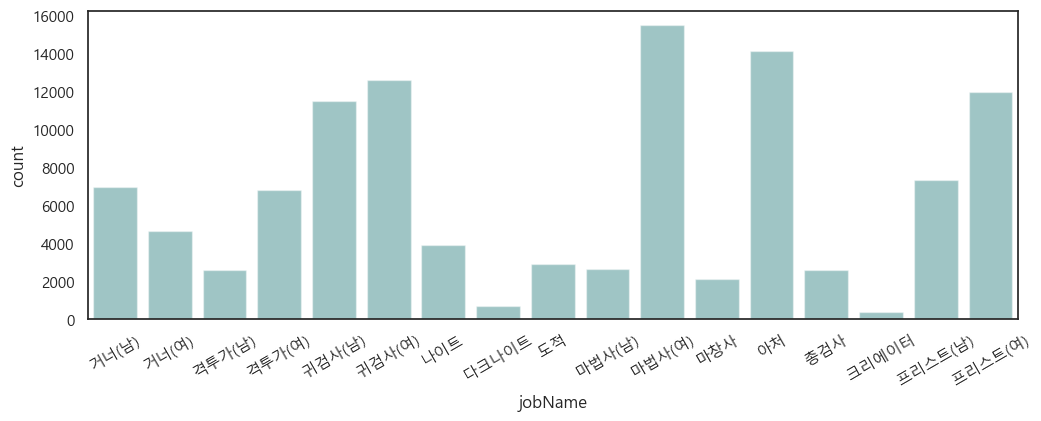

In [98]:
plt.figure(figsize=(12,4))
# plt.bar(jobdf.index, jobdf.values)
sns.barplot(data=jobdf, color = 'teal', alpha = 0.4)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.xticks(rotation=30)
plt.show()

여성 캐릭터의 비율이 높은 것으로 확인이 됨<br>
여성 캐릭터의 아바타의 인기가 높다는 추정을 하여 추후 아바타의 거래량과 시세를 통해 인기의 척도를 확인할 예정

#### 직업별 명성

In [91]:
df['fame'].mean()

61379.73818502916

In [120]:
df.groupby("jobName")['fame'].max().sort_values()

jobName
다크나이트      65938.0
크리에이터      65954.0
마법사(남)     66215.0
총검사        66237.0
마창사        66303.0
격투가(남)     66305.0
거너(여)      66317.0
나이트        66382.0
귀검사(여)     66386.0
격투가(여)     66402.0
프리스트(남)    66425.0
도적         66430.0
아처         66539.0
프리스트(여)    66660.0
귀검사(남)     66666.0
거너(남)      66702.0
마법사(여)     66993.0
Name: fame, dtype: float64

In [121]:
df.groupby("jobName")['fame'].mean().sort_values()

jobName
아처         61248.188781
프리스트(여)    61299.696677
마창사        61303.992341
총검사        61335.764706
프리스트(남)    61369.106742
격투가(여)     61379.764402
귀검사(여)     61382.384817
나이트        61384.808039
귀검사(남)     61415.753052
마법사(여)     61416.615992
마법사(남)     61432.255877
거너(여)      61447.459296
도적         61462.259672
격투가(남)     61469.033320
다크나이트      61507.980363
거너(남)      61533.667051
크리에이터      61543.945783
Name: fame, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9896\2711637513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='jobName', y='fame', palette = 'Set3')


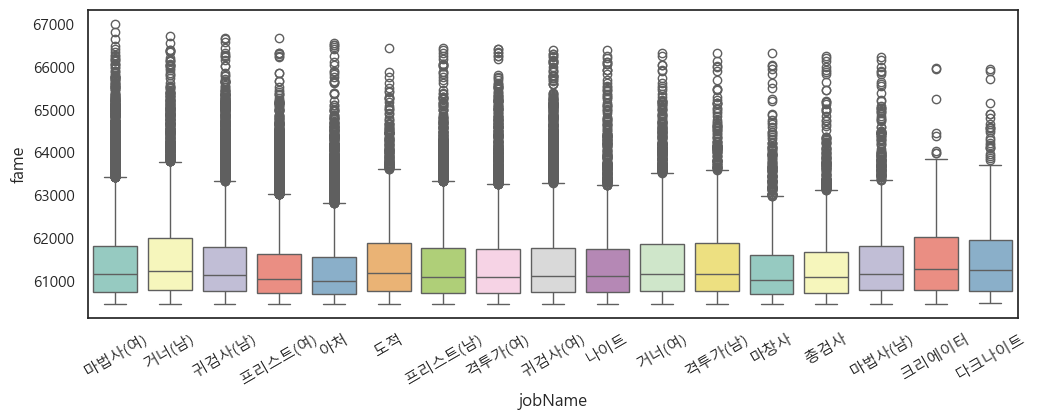

In [106]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='jobName', y='fame', palette = 'Set3')
plt.xticks(rotation=30)
plt.show()

중간값과 25%~75%의 값들은 상대적으로 비슷한 수준을 띄고 있으나 최댓값들의 차이가 존재함을 알 수 있음</br>
유저 수가 많은 직업들의 명성이 높은 것을 확인 할 수 있음

In [81]:
joblist = list(df['jobName'].unique())


거너(남) : GunnerM</br>
거너(여) : GunnerW</br>
격투가(남) : FighterM</br>
격투가(여) : FighterW</br>
귀검사(남) : Ghost KnightM</br>
귀검사(여) : Ghost KnightW</br>
나이트 : Knight</br>
다크나이트 : Dark Knight</br>
도적 : Thief</br>
마법사(남) : MageM</br>
마법사(여) : MageW</br>
마창사 : Demonic Lancer</br>
아처 : Archer</br>
총검사 : Gunblader</br>
크리에이터 : Creator</br>
프리스트(남) : PriestM</br>
프리스트(여) : PriestW</br>

In [82]:
# GunnerM = df[df['jobName']=='거너(남)']
# GunnerW = df[df['jobName']=='거너(여)']
# FighterM = df[df['jobName']=='격투가(남)']
# FighterW = df[df['jobName']=='격투가(여)']
# GhostknightM = df[df['jobName']=='귀검사(남)']
# GhostknightW = df[df['jobName']=='귀검사(여)']
# Knight = df[df['jobName']=='나이트']
# Darkknight = df[df['jobName']=='다크나이트']
# Thief = df[df['jobName']=='도적']
# MageM = df[df['jobName']=='마법사(남)']
# MageW = df[df['jobName']=='마법사(여)']
# Demoniclancer = df[df['jobName']=='마창사']
# Archer = df[df['jobName']=='아처']
# Gunblader = df[df['jobName']=='총검사']
# Creator = df[df['jobName']=='크리에이터']
# PriestM = df[df['jobName']=='프리스트(남)']
# PriestW = df[df['jobName']=='프리스트(여)']

In [75]:
GunnerM = data[data['jobName']=='거너(남)']
GunnerW = data[data['jobName']=='거너(여)']
FighterM = data[data['jobName']=='격투가(남)']
FighterW = data[data['jobName']=='격투가(여)']
GhostknightM = data[data['jobName']=='귀검사(남)']
GhostknightW = data[data['jobName']=='귀검사(여)']
Knight = data[data['jobName']=='나이트']
Darkknight = data[data['jobName']=='다크나이트']
Thief = data[data['jobName']=='도적']
MageM = data[data['jobName']=='마법사(남)']
MageW = data[data['jobName']=='마법사(여)']
Demoniclancer = data[data['jobName']=='마창사']
Archer = data[data['jobName']=='아처']
Gunblader = data[data['jobName']=='총검사']
Creator = data[data['jobName']=='크리에이터']
PriestM = data[data['jobName']=='프리스트(남)']
PriestW = data[data['jobName']=='프리스트(여)']

In [77]:
a="GunnerM,GunnerW,FighterM,FighterW,GhostknightM,GhostknightW,Knight,Darkknight,Thief,MageM,MageW,Demoniclancer,Archer,Gunblader,Creator,PriestM,PriestW"
jobname = a.split(",")

In [78]:
jobname

['GunnerM',
 'GunnerW',
 'FighterM',
 'FighterW',
 'GhostknightM',
 'GhostknightW',
 'Knight',
 'Darkknight',
 'Thief',
 'MageM',
 'MageW',
 'Demoniclancer',
 'Archer',
 'Gunblader',
 'Creator',
 'PriestM',
 'PriestW']

In [76]:
jobdf_list = [GunnerM,
GunnerW,
FighterM,
FighterW,
GhostknightM,
GhostknightW,
Knight,
Darkknight,
Thief,
MageM,
MageW,
Demoniclancer,
Archer,
Gunblader,
Creator,
PriestM,
PriestW,]

### 유저가 착용 중인 아이템 확인

In [80]:
data['HEADGEAR__avatar_itemId'].value_counts().index

Index(['2defdc2422ff3c61f5ac1af583e79459', '92d9839ad426f31e9de3508d001f84ca',
       '4073653019b52f859d27c96265c0b0a3', 'c90044ec63bf1520c5bc4a9385ff466d',
       '3bd48b7a41985ad02bd07ec91dcf04a8', 'b8c1f046fe4fe0677f19195385d19b04',
       '80c6a6b7b5c1ab32bb401dfadf76ace8', 'b8719abf78adc19335324f5a36f5987c',
       'c8032d3f73fee655c33b30444ddd1eaa', '851f5dae01e9ed0597e533cd78700f00',
       ...
       'f76b941c0987e0de56117287ce33d45d', '6996eec45d98d7e165f4cd9524adc34a',
       '27acdd98f35020c744eb046aea20099c', '760540ccbcfe523bd263b64b9405b87b',
       '3c2eaa4f26d8e8a5417c9a4facd256b6', '04e2f6736e60cba84eb7b5e243f4996c',
       '5da9726e0af825587b53165d4f798feb', '0dccbc01bf82e6fe94fb9349874591e3',
       'f0a36e1ed531243c2bc177edb6bfd009', '1e9711921844b0934ab0304dd49335ed'],
      dtype='object', name='HEADGEAR__avatar_itemId', length=656)

In [81]:
data['HEADGEAR__avatar_itemName'].value_counts()

HEADGEAR__avatar_itemName
레어 모자 클론 아바타                84177
주황색 제복모                       306
신성한 은여우 전사의 투구                275
검은색 악마뿔                       207
블랙크로우 투구                      147
                            ...  
노블레스 화이트 크로스 투구                 1
원탁의 기사 아서왕의 실버 왕관[C타입]          1
우아한 나비 숙녀의 나비 헤어 장식[E타입]        1
반투 얼음조각 장식                      1
진 디멘션워커의 무늬 타투[B타입]             1
Name: count, Length: 439, dtype: int64

In [79]:
for i in range(len(jobdf_list)):
    print(jobname[i])
    print(len(jobdf_list[i]['HEADGEAR__avatar_itemId'].value_counts().index))
    print(len(jobdf_list[i]['HEADGEAR__avatar_itemName'].value_counts()))

GunnerM
53
40
GunnerW
38
29
FighterM
36
29
FighterW
47
34
GhostknightM
70
51
GhostknightW
42
33
Knight
30
25
Darkknight
23
19
Thief
28
24
MageM
38
33
MageW
82
67
Demoniclancer
25
20
Archer
17
15
Gunblader
18
14
Creator
22
19
PriestM
71
57
PriestW
61
53


>> itemName이 같지만 itemId가 다른 경우가 존재